In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# Colab 한글 폰트 설정
# !pip install koreanize-matplotlib
# import koreanize_matplotlib
# import matplotlib.pyplot as plt

In [157]:
data = pd.read_csv('https://raw.githubusercontent.com/bamcasa/Statistical-Computing/refs/heads/main/jeju_data.csv')

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13639 entries, 0 to 13638
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TRAVELER_ID                13639 non-null  object 
 1   VISIT_AREA_ID              13639 non-null  int64  
 2   ACTIVITY_TYPE_CD           13639 non-null  int64  
 3   ACTIVITY_TYPE_SEQ          13639 non-null  int64  
 4   CONSUME_HIS_SEQ            13639 non-null  int64  
 5   CONSUME_HIS_SNO            13639 non-null  int64  
 6   PAYMENT_NUM                13639 non-null  int64  
 7   BRNO                       13219 non-null  float64
 8   STORE_NM                   13636 non-null  object 
 9   ROAD_NM_ADDR               13639 non-null  object 
 10  LOTNO_ADDR                 13639 non-null  object 
 11  ROAD_NM_CD                 13639 non-null  float64
 12  LOTNO_CD                   13639 non-null  float64
 13  PAYMENT_DT                 13639 non-null  obj

In [159]:
data

,TRAVELER_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,...,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC,SGG_CD,PAYMENT_DT_HOUR,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION
0,h001195,2306220006,1,0,0,1,4,8.979102e+09,동문남해수산,제주특별자치도 제주시 동문로2길 10,...,4847600.0,5.011010e+09,2023-06,1,40000.0,NaN,NaN,19,충청남도,제주
1,h000051,2305280009,1,0,0,1,1,2.018122e+09,스타벅스,제주특별자치도 서귀포시 성산읍 일출로 80,...,3350244.0,5.013026e+09,2023-05,3,6900.0,V)핑크 D리프레셔,NaN,20,대전광역시,제주
2,h000051,2305290005,1,0,0,1,1,4.830402e+09,오늘의 감정 오감,제주특별자치도 제주시 구좌읍 세화11길 12,...,4848006.0,5.011026e+09,2023-05,1,6000.0,당근쥬스,NaN,13,대전광역시,제주
3,h000053,2305260001,2,0,0,1,1,8.968200e+09,간세라운지,제주특별자치도 제주시 관덕로8길 7-9,...,4847168.0,5.011010e+09,2023-05,1,10000.0,규스마그간세;간세배지3종,NaN,8,경기도,제주
4,h000069,2305170012,1,0,0,2,2,6.169258e+09,탐라수산,제주특별자치도 서귀포시 중정로61번길 8,...,4850836.0,5.013010e+09,2023-05,1,8000.0,NaN,NaN,20,서울특별시,제주
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13634,h006870,2309230005,1,0,0,1,2,8.745401e+09,정씨네소몰이,제주특별자치도 제주시 원노형남1길 32,...,4848499.0,5.011012e+09,2023-09,1,101000.0,모듬구이(대) 샤브샤브;소주;샤브샤브추가;칼국수,NaN,19,제주특별자치도,제주
13635,h006870,2309230002,1,1,1,1,2,7.560502e+09,하우투플레이,제주특별자치도 제주시 애월읍 일주서로 6935,...,3349236.0,5.011025e+09,2023-09,1,36000.0,더블치즈버거;치즈버거;치킨/포테이트;닥터페퍼;스프라이트,NaN,12,제주특별자치도,제주
13636,h006874,2309220002,1,0,0,1,1,6.352601e+09,꼬스뗀뇨,제주특별자치도 제주시 구좌읍 해맞이해안로 2080,...,3349242.0,5.011026e+09,2023-09,1,9000.0,소금버터빵;아메리카노(ICE),NaN,13,제주특별자치도,제주
13637,h006874,2309220005,1,0,0,1,1,2.970201e+09,민경이네어등포해녀촌,제주특별자치도 제주시 구좌읍 해맞이해안로 830,...,3349242.0,5.011026e+09,2023-09,1,16000.0,NaN,NaN,18,제주특별자치도,제주


전처리

In [160]:
def extract_index_ro(x):
    # 공백으로 문자열을 나누어 리스트로 만듦
    if pd.notnull(x):  # x가 Null이 아닌 경우만 처리
        parts = x.split()
        # 리스트에서 '로'로 끝나는 문자열 찾기
        for part in parts:
            # '로'로 끝나는 문자열인데 parts에서 part의 인덱스가 2 이상인 경우 반환
            if part.endswith('로') and parts.index(part) >= 2:
                return part
    return None  # 조건에 맞는 문자열이 없을 경우 None 반환


def extract_index_one(x):
    if pd.notnull(x):
        parts = x.split()
        if len(parts) >= 3:
            return (parts[2])
    return None

data['ROAD_NM_ADDR'] = data['ROAD_NM_ADDR'].apply(extract_index_ro)
data['LOTNO_ADDR'] = data['LOTNO_ADDR'].apply(extract_index_one)

In [161]:
data['ROAD_NM_ADDR'].unique()

array([None, '일출로', '해맞이해안로', '애월해안로', '월평하원로', '일주동로', '서사로', '한림해안로',
       '남조로', '하가로', '남성중로', '조함해안로', '삼무로', '서해안로', '산록남로', '염돈로', '공항로',
       '하모중앙로', '보목포로', '녹차분재로', '오조로', '성산등용로', '형제해안로', '병악로', '테우해안로',
       '동문동로', '금백조로', '중문관광로', '동문로', '최남단해안로', '탑동로', '성화로', '한림로',
       '노연로', '애월로', '오라로', '쇠소깍로', '김정문화로', '고성오조로', '신북로', '애원로',
       '일주서로', '천제연로', '성산중앙로', '용문로', '중앙로', '효돈로', '1100로', '연명로',
       '연북로', '상한로', '표선동서로', '이어도로', '중산간동로', '우도로', '두신로', '서문로',
       '한림상로', '중산간서로', '한창로', '월드컵로', '공천포로', '칠십리로', '용해로', '사계신항로',
       '함덕로', '신서로', '색달중앙로', '용마로', '한도로', '난드르로', '516로', '하모항구로',
       '장소로', '소암로', '신형로', '금능남로', '번영로', '난고로', '화순로', '중정로', '신화역사로',
       '유수암로', '명림로', '녹산로', '고성동서로', '동복로', '하모상가로', '천덕로', '신고로', '산방로',
       '동홍서로', '산록북로', '이중섭로', '한경해안로', '한라대학로', '평화로', '부두로', '동류암로',
       '민속해안로', '신례동로', '환해장성로', '청사로', '명월로', '두조로', '대평로', '어림비로',
       '아봉로', '선반로', '한수풀로', '하소로', '신산로', '색달로', '중문로', '월성로', '노을해안로',
   

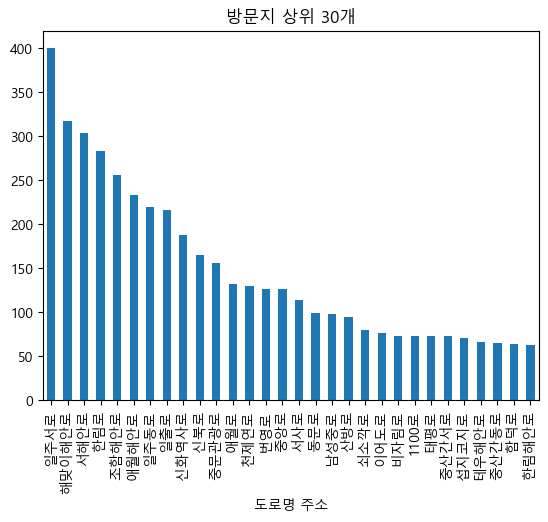

In [162]:
# 상위 30개만 시각화
plt.title('방문지 상위 30개')
data['ROAD_NM_ADDR'].value_counts().head(30).plot(kind='bar')
# x축 이름
plt.xlabel('도로명 주소')
plt.show()

In [163]:
data['LOTNO_ADDR'].unique()

array(['일도일동', '성산읍', '구좌읍', '서귀동', '이도일동', '애월읍', '삼도이동', '용담이동', '우도면',
       '외도일동', '월평동', '동홍동', '영평동', '한림읍', '색달동', '표선면', '서홍동', '강정동',
       '조천읍', '연동', '용담삼동', '안덕면', '대정읍', '이도이동', '남원읍', '하효동', '한경면',
       '이호일동', '중문동', '오라삼동', '대포동', '법환동', '오라일동', '도두일동', '노형동', '화북이동',
       '용담일동', '삼양일동', '회수동', '삼도일동', '도두이동', '토평동', '일도이동', '아라일동',
       '하예동', '건입동', '상예동', '상효동', '해안동', '봉개동', '오등동', '도남동', '외도이동',
       '화북일동', '호근동', '서호동', '회천동', '오라이동', '아라이동', '이호이동', '도련이동', '신효동',
       '보목동', '삼양이동', '도련일동', '영남동', '내도동', '도평동', '하원동', '삼양삼동', '도순동'],
      dtype=object)

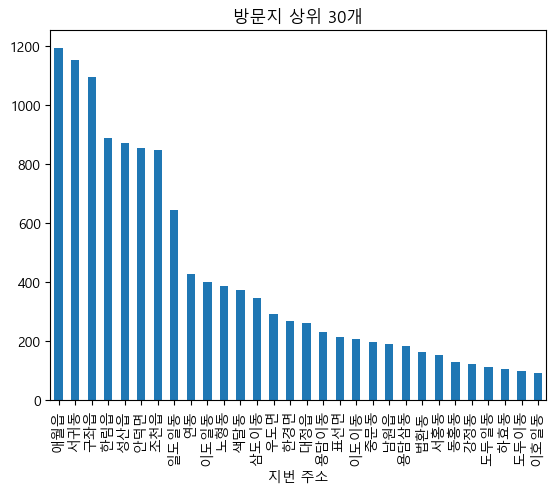

In [164]:
# 상위 30개만 시각화
plt.title('방문지 상위 30개') 
data['LOTNO_ADDR'].value_counts().head(30).plot(kind='bar')
# x축 이름
plt.xlabel('지번 주소')
plt.show()

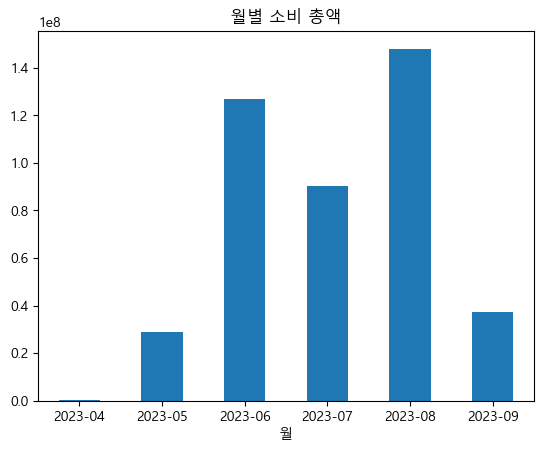

In [165]:
# 월별 소비 총액
plt.title('월별 소비 총액')
data.groupby('PAYMENT_DT')['PAYMENT_AMT_WON'].sum().plot(kind='bar')
plt.xticks(rotation=0)
# x축 이름
plt.xlabel('월')
plt.show()

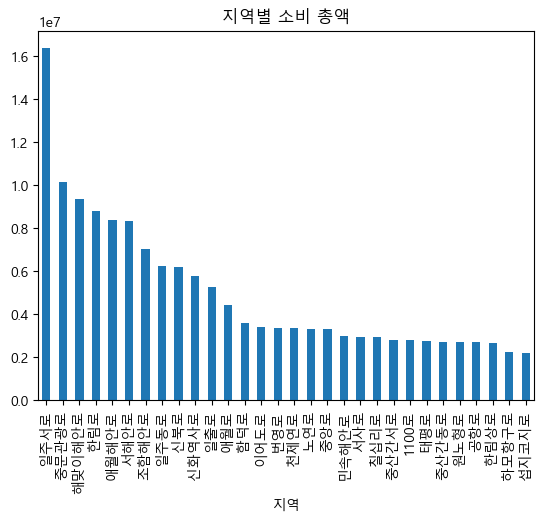

In [166]:
# 지역별 소비 총액 상위 30개만
plt.title('지역별 소비 총액')
data.groupby('ROAD_NM_ADDR')['PAYMENT_AMT_WON'].sum().sort_values(ascending=False).head(30).plot(kind='bar')
# x축 이름
plt.xlabel('지역')
plt.show()

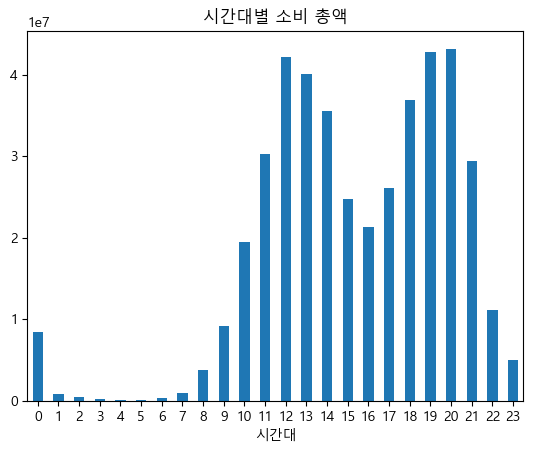

In [167]:
# 시간대 별 소비 총액
plt.title('시간대별 소비 총액')
data.groupby('PAYMENT_DT_HOUR')['PAYMENT_AMT_WON'].sum().plot(kind='bar')
plt.xticks(rotation=0)
# x축 이름
plt.xlabel('시간대')
plt.show()

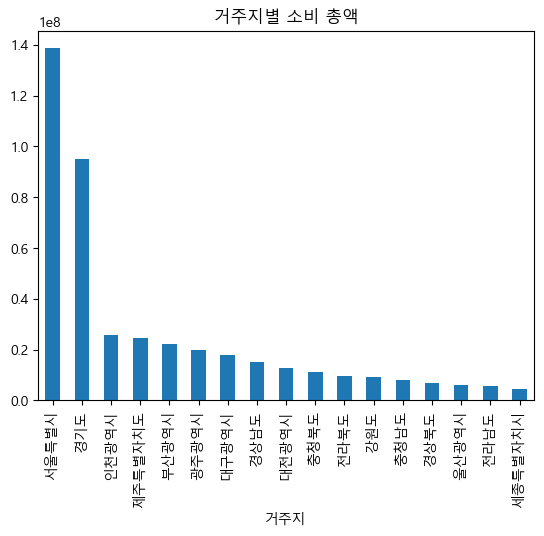

In [168]:
# TRAVEL_STATUS_RESIDENCE별 소비 총액

plt.title('거주지별 소비 총액')
data.groupby('TRAVEL_STATUS_RESIDENCE')['PAYMENT_AMT_WON'].sum().sort_values(ascending=False).plot(kind='bar')
# x축 이름
plt.xlabel('거주지')
plt.show()

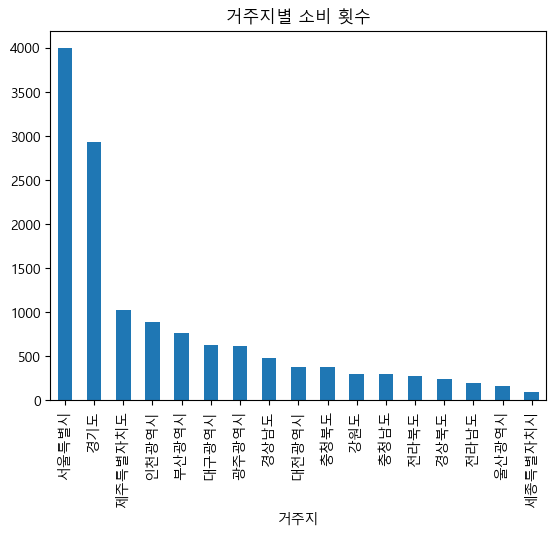

In [169]:
# TRAVEL_STATUS_RESIDENCE 개수'
plt.title('거주지별 소비 횟수')
data['TRAVEL_STATUS_RESIDENCE'].value_counts().plot(kind='bar')
# x축 이름
plt.xlabel('거주지')
plt.show()

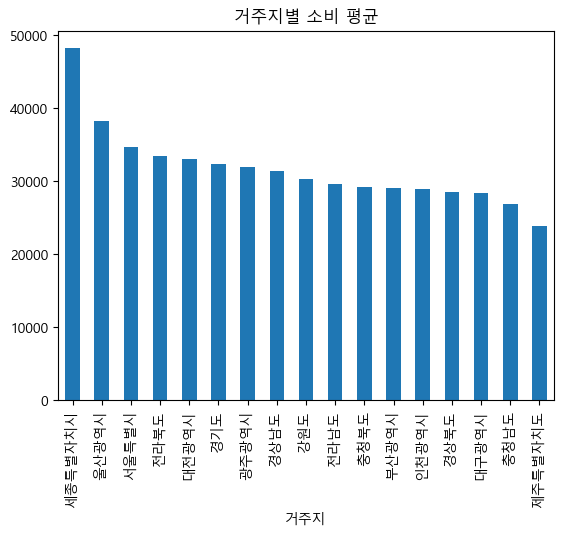

In [170]:
# TRAVEL_STATUS_RESIDENCE(거주지)별 소비 평균
# 제목 : 거주지별 소비 평균

plt.title('거주지별 소비 평균')

data.groupby('TRAVEL_STATUS_RESIDENCE')['PAYMENT_AMT_WON'].mean().sort_values(ascending=False).plot(kind='bar')
# x축 이름
plt.xlabel('거주지')
plt.show()
